In [1]:
import numpy as np 
import pandas as pd

import utils 

import matplotlib.pyplot as plt
import matplotlib as mpl

import umap
import plotly.express as px

# import umap.plot

# plt.rcParams['text.usetex'] = True


In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
import importlib
importlib.reload(utils)
# importlib.reload(px)

<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [4]:
savepath = utils.Save.savepath('vis_traj')

In [5]:
subj = utils.ExpInfo.getSubjIDs()[0]
task = utils.ExpInfo.taskName[0]

In [17]:
v, v_disp = utils.LoadData.mouseMovement_array(subj, task, velocity=True)
x, h, y = utils.LoadData.xhy(subj, task)
# x_disp, h_disp, y_disp = utils.LoadData.xhy_disp(subj, task)
# df_beh = utils.LoadData.behaviorData(subj, task)


In [7]:
iTrial = 14


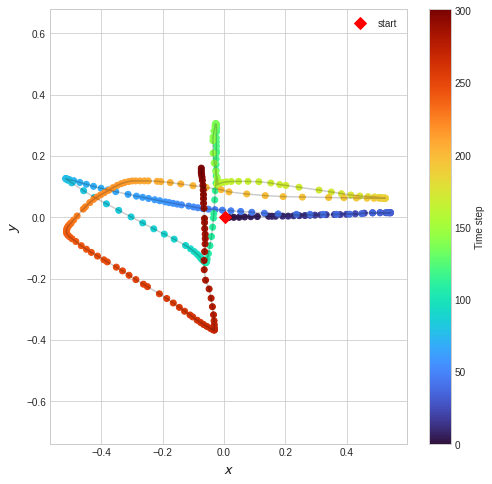

In [7]:
vx = v[iTrial][:, 0]
vy = v[iTrial][:, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
utils.Plot.traj_withColour(vx.cumsum(), vy.cumsum(), fig, ax)
ax.axis('equal')
ax.set_xlabel('$\mathcal{x}$', fontsize=16)
ax.set_ylabel("$\mathcal{y}$", fontsize=16)
fig.savefig(savepath / 'traj_withColour.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


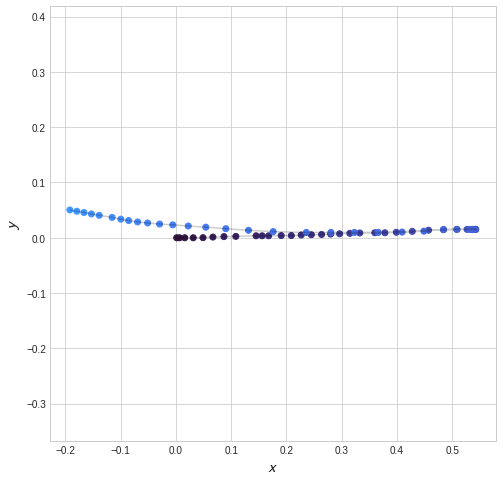

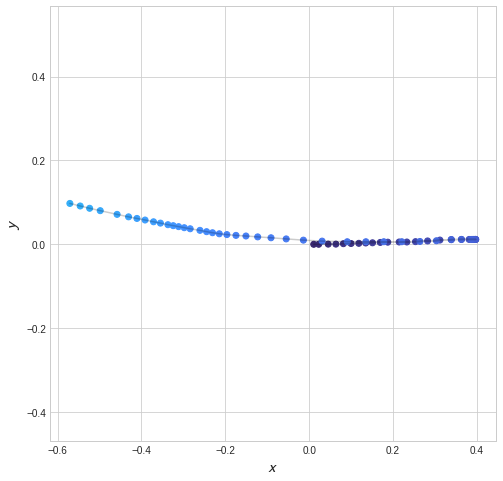

In [9]:
t = np.arange(0, 60)
def traj_withColour(x, y, fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    cmap = plt.get_cmap('turbo')
    colors = cmap(np.linspace(0, 1, len(v[iTrial])))
    # colors = np.linspace(0, 1, len(v[iTrial]))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors[t])
    # print(colors)
    # ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    # norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    # cbar = fig.colorbar(mpl.cm.ScalarMappable(
    #     cmap='turbo', norm=norm), ax=ax)
    # cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    return fig, ax

vx = v[iTrial][t, 0]
vy = v[iTrial][t, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
traj_withColour(vx.cumsum(), vy.cumsum(), fig, ax)
ax.axis('equal')
ax.set_xlabel('$\mathcal{x}$', fontsize=16)
ax.set_ylabel("$\mathcal{y}$", fontsize=16)
fig.savefig(savepath / 'traj_withColour_seg.pdf')


t = np.arange(9, 70)
vx = v[iTrial][t, 0]
vy = v[iTrial][t, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
traj_withColour(vx.cumsum(), vy.cumsum(), fig, ax)
ax.axis('equal')
ax.set_xlabel('$\mathcal{x}$', fontsize=16)
ax.set_ylabel("$\mathcal{y}$", fontsize=16)
fig.savefig(savepath / 'traj_withColour_seg2.pdf')



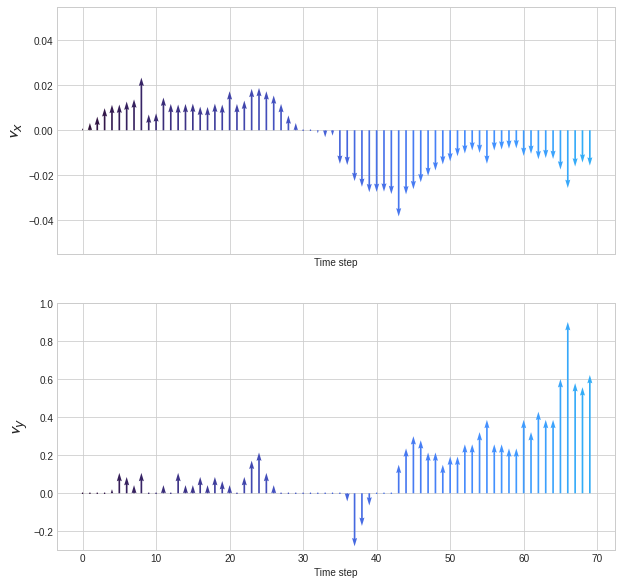

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False)
# colors = np.linspace(0, 1, len(vx))
cmap = plt.get_cmap('turbo')
colors = cmap(np.linspace(0, 1, len(vx)))

head_width = 0.3
head_length = 0.0005

nTime = 70
ax[0].set_xlabel('Time step')
ax[0].set_ylabel("$\mathcal{v}_x$", fontsize=18)
ax[0].quiver(np.arange(nTime), np.zeros(nTime), np.zeros(nTime), vx[:nTime], color=colors[:nTime], width=0.003)
ax[0].set_ylim(-0.3, 1)

ax[1].set_xlabel('Time step')
ax[1].set_ylabel("$\mathcal{v}_y$", fontsize=18)
ax[1].quiver(np.arange(nTime), np.zeros(nTime), np.zeros(nTime), vy[:nTime], color=colors[:nTime], width=0.003)
ax[1].set_ylim(-0.3, 1)

fig.savefig(savepath / 'traj_withColour_quiver.pdf')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


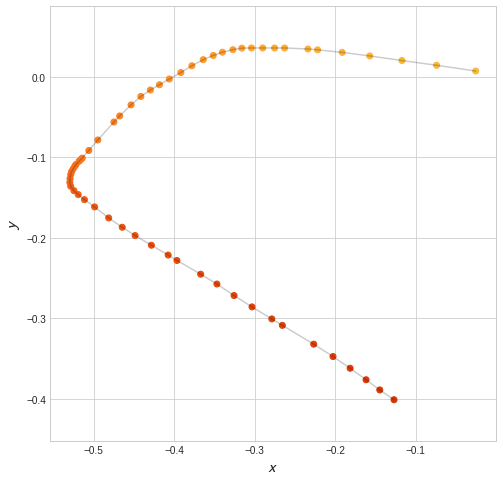

In [11]:
t = np.arange(200, 260)
vx = v[iTrial][t, 0]
vy = v[iTrial][t, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
traj_withColour(vx.cumsum(), vy.cumsum(), fig, ax)
ax.axis('equal')
ax.set_xlabel('$\mathcal{x}$', fontsize=16)
ax.set_ylabel("$\mathcal{y}$", fontsize=16)
fig.savefig(savepath / 'traj_withColour_seg3.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


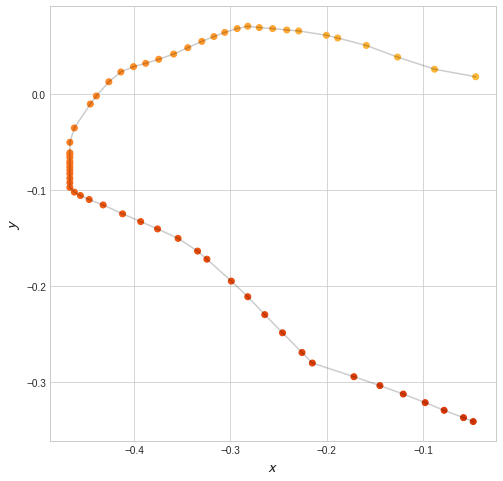

In [18]:
t = np.arange(200, 260)
vx = v_disp[iTrial][t, 0]
vy = v_disp[iTrial][t, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
traj_withColour(vx.cumsum(), vy.cumsum(), fig, ax)
ax.axis('equal')
ax.set_xlabel('$\mathcal{x}$', fontsize=16)
ax.set_ylabel("$\mathcal{y}$", fontsize=16)
fig.savefig(savepath / 'traj_withColour_seg3_disp.pdf')

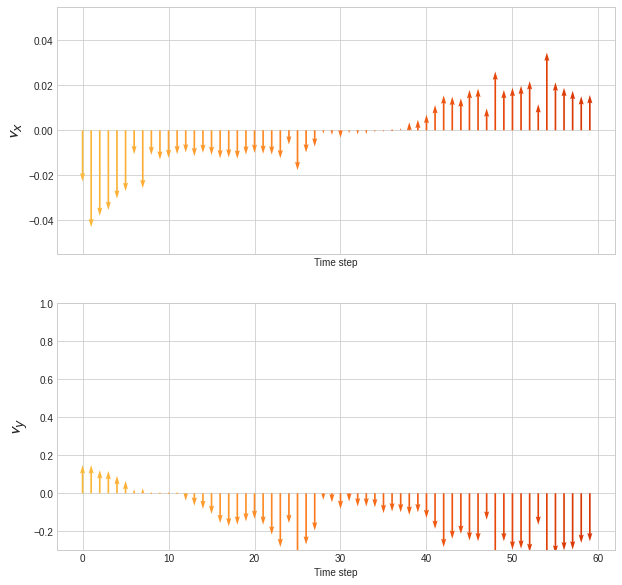

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False)
# colors = np.linspace(0, 1, len(vx))
cmap = plt.get_cmap('turbo')
colors = cmap(np.linspace(0, 1, len(v[iTrial])))

head_width = 0.3
head_length = 0.0005

nTime = 70
ax[0].set_xlabel('Time step')
ax[0].set_ylabel("$\mathcal{v}_x$", fontsize=18)
ax[0].quiver(np.arange(len(t)), np.zeros(len(t)), np.zeros(len(t)), vx, color=colors[t], width=0.003)

ax[1].set_xlabel('Time step')
ax[1].set_ylabel("$\mathcal{v}_y$", fontsize=18)
ax[1].quiver(np.arange(len(t)), np.zeros(len(t)), np.zeros(len(t)), vy, color=colors[t], width=0.003)
ax[1].set_ylim(-0.3, 1)

fig.savefig(savepath / 'traj_withColour_quiver2.pdf')


In [20]:
fit = umap.UMAP(n_components=3)
u = fit.fit_transform(h[iTrial])


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


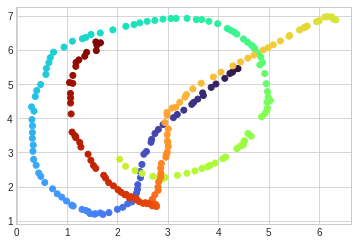

In [17]:
cmap = plt.get_cmap('turbo')
colors = cmap(np.linspace(0, 1, len(u)))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(u[:, 0], u[:, 1], c=colors)

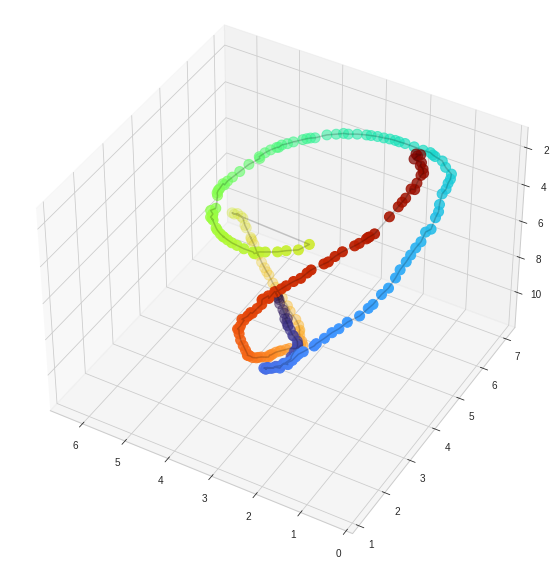

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=colors, s=100)
ax.plot(u[:,0], u[:,1], u[:,2],'-k', alpha=0.2) 
ax.view_init(-140, 60)


In [20]:
fig = px.scatter_3d(x=u[:,0], y=u[:,1], z=u[:,2], 
                    color=np.linspace(0, 1, len(u)), 
                    color_continuous_scale ='turbo', 
                    size=np.ones(len(u)), width=1000, height=1000)
fig.add_scatter3d(x=u[:,0], y=u[:,1], z=u[:,2], mode='lines', opacity=0.3,
                  marker=dict(color='rgb(0, 0, 0)',
                              size=10),
                  line=dict(width=5))
fig.update_layout(scene = dict(
                    xaxis_title='UMAP 1',
                    yaxis_title='UMAP 2',
                    zaxis_title='UMAP 3'))
fig.update_layout(scene = dict(aspectmode='cube'))
fig.show()


In [ ]:
fig.write_image(savepath / '3d.pdf', scale=)
